https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/linear_regression/main.py#L22-L23

# Linear regression

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

c:\python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

In [4]:
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)


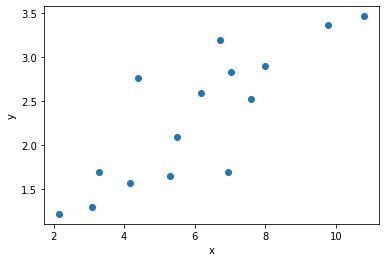

In [5]:
plt.plot(x_train, y_train, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
x_train = torch.tensor(x_train)
y_train = torch.tensor(y_train)

In [19]:
w = torch.tensor(0., requires_grad=True)
b = torch.tensor(0., requires_grad=True)

for i in range(100):
    y = w * x_train + b
    loss = torch.sum((y - y_train)**2) / 15
    loss.backward()
    with torch.no_grad():
        w -= 0.001 * w.grad
        b -= 0.001 * b.grad
    w.grad.zero_()
    b.grad.zero_()
    #print(loss.item())

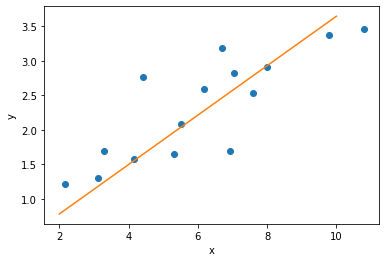

In [22]:
plt.plot(x_train, y_train, 'o')
xx = np.linspace(2, 10, 100)
plt.plot(xx, w.item() * xx + b.item())
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [25]:
# Linear regression model
model = torch.nn.Linear(input_size, output_size) # y = w * x + b

In [28]:
model(torch.tensor([[0.], [1.], [2.]]))

tensor([[ 0.1699],
        [-0.0521],
        [-0.2741]], grad_fn=<AddmmBackward0>)

In [24]:
input_size, output_size

(1, 1)

In [29]:
for p in model.parameters():
    print(p)

Parameter containing:
tensor([[-0.2220]], requires_grad=True)
Parameter containing:
tensor([0.1699], requires_grad=True)


In [8]:
for name, p in model.named_parameters():
    print('name:', name, p)

name: weight Parameter containing:
tensor([[0.8976]], requires_grad=True)
name: bias Parameter containing:
tensor([-0.2304], requires_grad=True)


In [30]:
model

Linear(in_features=1, out_features=1, bias=True)

In [31]:
model.weight

Parameter containing:
tensor([[-0.2220]], requires_grad=True)

In [32]:
model.bias

Parameter containing:
tensor([0.1699], requires_grad=True)

In [33]:
model(torch.tensor([10.]))

tensor([-2.0504], grad_fn=<AddBackward0>)

In [35]:
# Loss function
criterion = torch.nn.MSELoss()

In [36]:
criterion(torch.tensor([1,2,3.]), torch.tensor([3,2,1.]))

tensor(2.6667)

In [41]:
# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [42]:
learning_rate

0.001

In [43]:
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)


In [44]:
# Convert numpy arrays to torch tensors
inputs = torch.from_numpy(x_train)
targets = torch.from_numpy(y_train)

# Train the model
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() # W(t+1) = W(t) - lr * W.grad
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


Epoch [5/60], Loss: 6.7603
Epoch [10/60], Loss: 2.8584
Epoch [15/60], Loss: 1.2777
Epoch [20/60], Loss: 0.6372
Epoch [25/60], Loss: 0.3777
Epoch [30/60], Loss: 0.2725
Epoch [35/60], Loss: 0.2299
Epoch [40/60], Loss: 0.2125
Epoch [45/60], Loss: 0.2055
Epoch [50/60], Loss: 0.2026
Epoch [55/60], Loss: 0.2013
Epoch [60/60], Loss: 0.2008


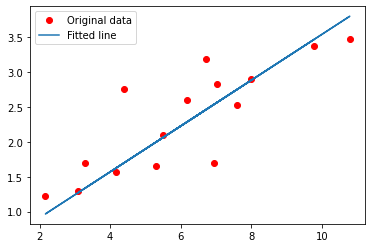

In [45]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

In [47]:
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

In [46]:
model.state_dict()

OrderedDict([('weight', tensor([[0.3280]])), ('bias', tensor([0.2568]))])